# Explore Images

In [4]:
from imageio import imread
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from os import walk

In [2]:
# check the dimensions of the images
path = '/Users/julieshih/workspace/Springboard/img_landmark/'
f = []

for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    break
    
img_arrays = []

for file_no in range(30): # sample a portion of images
    im = mpimg.imread(path+f[file_no])
    img_arrays.append(im)
    print('Image dimensions: ',im.shape)

Image dimensions:  (512, 342, 3)
Image dimensions:  (512, 512, 3)
Image dimensions:  (370, 290, 3)
Image dimensions:  (376, 468, 3)
Image dimensions:  (512, 342, 3)
Image dimensions:  (512, 512, 3)
Image dimensions:  (512, 342, 3)
Image dimensions:  (478, 318, 3)
Image dimensions:  (512, 349, 3)
Image dimensions:  (512, 384, 3)
Image dimensions:  (468, 468, 3)
Image dimensions:  (512, 384, 3)
Image dimensions:  (512, 354, 3)
Image dimensions:  (512, 414, 3)
Image dimensions:  (300, 300, 3)
Image dimensions:  (512, 342, 3)
Image dimensions:  (512, 512, 3)
Image dimensions:  (512, 384, 3)
Image dimensions:  (512, 384, 3)
Image dimensions:  (452, 308, 3)
Image dimensions:  (512, 288, 3)
Image dimensions:  (346, 236, 3)
Image dimensions:  (512, 236, 3)
Image dimensions:  (300, 300, 3)
Image dimensions:  (300, 300, 3)
Image dimensions:  (452, 308, 3)
Image dimensions:  (400, 299, 3)
Image dimensions:  (250, 200, 3)
Image dimensions:  (345, 225, 3)
Image dimensions:  (512, 384, 3)


Images are generally between 200-520 px by 200-520 px. The images are in color (3 channels).

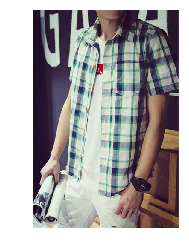

In [5]:
# display a single image
plt.imshow(img_arrays[15])
plt.axis("off")
plt.show()

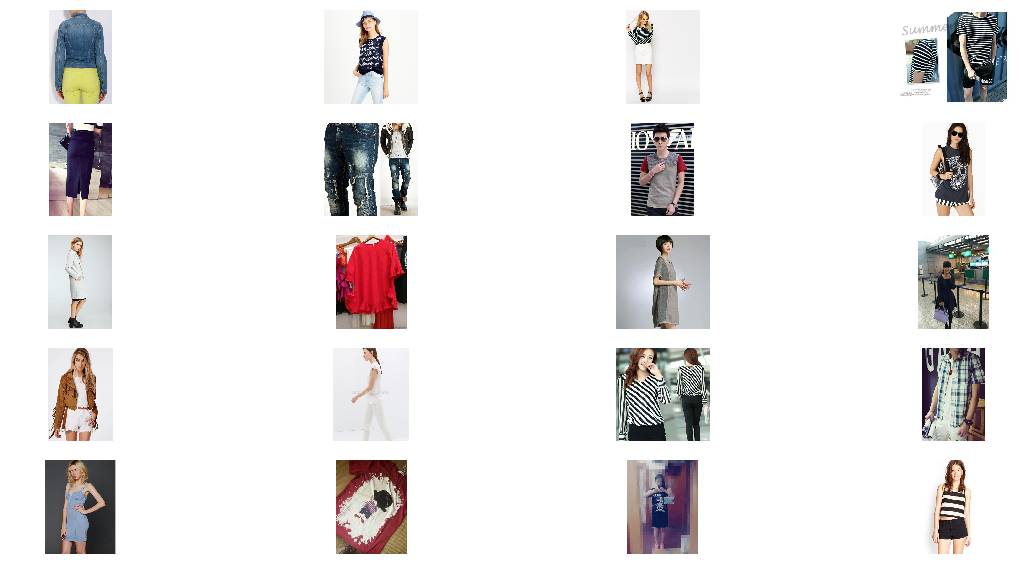

In [6]:
# display multiple images
fig = plt.figure(figsize=(20, 10))

for file_no in range(20):
    im = mpimg.imread(path+f[file_no])
    plt.subplot(5,4,file_no+1)
    plt.axis("off")
    plt.imshow(im)
    
plt.show()

The landmark dataset contains clothing images at various angles, both with and without model. Some images are a compilation of multiple images of the same outfit.

# Explore Annotations

In [16]:
import csv
import pandas as pd

anno_path = '/Users/julieshih/workspace/Springboard/img_landmark/Anno/list_landmarks.txt'
df = pd.read_csv(anno_path, sep=' ',skiprows=1).dropna(axis=1, how='all')

In [17]:
df.head(10)

,image_name,clothes_type,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,...,landmark_location_y_5,landmark_visibility_6,landmark_location_x_6,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8
0,img/img_00000001.jpg,1,1,1,144,156,1,221,159,0,...,408.0,0.0,237.0,412.0,NaN,NaN,NaN,NaN,NaN,NaN
1,img/img_00000002.jpg,1,3,0,111,104,1,153,105,0,...,188.0,1.0,137.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN
2,img/img_00000003.jpg,1,1,0,112,113,1,172,117,0,...,277.0,1.0,187.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN
3,img/img_00000004.jpg,1,2,0,76,74,0,108,69,0,...,174.0,0.0,126.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN
4,img/img_00000005.jpg,1,1,0,217,139,0,290,156,0,...,314.0,0.0,309.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN
5,img/img_00000006.jpg,1,1,1,63,50,1,98,51,0,...,135.0,0.0,97.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN
6,img/img_00000007.jpg,1,1,1,106,124,1,180,116,0,...,306.0,0.0,187.0,304.0,NaN,NaN,NaN,NaN,NaN,NaN
7,img/img_00000008.jpg,1,3,1,181,193,0,197,188,1,...,430.0,1.0,129.0,432.0,NaN,NaN,NaN,NaN,NaN,NaN
8,img/img_00000009.jpg,1,2,1,133,142,0,160,147,1,...,303.0,0.0,116.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN
9,img/img_00000010.jpg,1,1,1,74,64,0,121,71,0,...,206.0,0.0,131.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN


Description of annotations: 

clothes type
* 1 = upper body (6 fashion landmarks)
* 2 = lower body (4 fashion landmarks)
* 3 = full body  (8 fashion landmarks)


variation type
* 1 = normal pose
* 2 = medium pose
* 3 = large pose
* 4 = medium zoom in
* 5 = large zoom in

visibility type
* 0 = visible
* 1 = occluded
* 2 = truncated

In [25]:
# Build a sampled dataset of:
# 1000 images
# upper-body only
# normal pose
# fully visible

sample_df =  df.loc[(df.clothes_type == 1) & 
               (df.variation_type == 1) &
               (df.landmark_visibility_1 == 0 ) &
               (df.landmark_visibility_2 == 0 ) &
               (df.landmark_visibility_3 == 0 ) &
               (df.landmark_visibility_4 == 0 ) &
               (df.landmark_visibility_5 == 0 ) &
               (df.landmark_visibility_6 == 0 ) ].dropna(axis=1, how='all')

In [26]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5607 entries, 4 to 122997
Data columns (total 21 columns):
image_name               5607 non-null object
clothes_type             5607 non-null int64
variation_type           5607 non-null int64
landmark_visibility_1    5607 non-null int64
landmark_location_x_1    5607 non-null int64
landmark_location_y_1    5607 non-null int64
landmark_visibility_2    5607 non-null int64
landmark_location_x_2    5607 non-null int64
landmark_location_y_2    5607 non-null int64
landmark_visibility_3    5607 non-null int64
landmark_location_x_3    5607 non-null int64
landmark_location_y_3    5607 non-null int64
landmark_visibility_4    5607 non-null int64
landmark_location_x_4    5607 non-null int64
landmark_location_y_4    5607 non-null int64
landmark_visibility_5    5607 non-null float64
landmark_location_x_5    5607 non-null float64
landmark_location_y_5    5607 non-null float64
landmark_visibility_6    5607 non-null float64
landmark_location_x_6    56

In [27]:
sample_df.head(10)

,image_name,clothes_type,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,...,landmark_location_y_3,landmark_visibility_4,landmark_location_x_4,landmark_location_y_4,landmark_visibility_5,landmark_location_x_5,landmark_location_y_5,landmark_visibility_6,landmark_location_x_6,landmark_location_y_6
4,img/img_00000005.jpg,1,1,0,217,139,0,290,156,0,...,223,0,328,250,0.0,183.0,314.0,0.0,309.0,313.0
15,img/img_00000016.jpg,1,1,0,219,119,0,243,121,0,...,145,0,279,151,0.0,196.0,251.0,0.0,239.0,256.0
28,img/img_00000029.jpg,1,1,0,172,138,0,202,138,0,...,161,0,253,182,0.0,146.0,388.0,0.0,205.0,395.0
30,img/img_00000031.jpg,1,1,0,183,143,0,205,146,0,...,174,0,271,189,0.0,132.0,421.0,0.0,232.0,426.0
75,img/img_00000076.jpg,1,1,0,147,118,0,179,121,0,...,145,0,226,141,0.0,128.0,327.0,0.0,198.0,329.0
80,img/img_00000081.jpg,1,1,0,140,179,0,194,174,0,...,361,0,284,356,0.0,117.0,439.0,0.0,209.0,446.0
86,img/img_00000087.jpg,1,1,0,145,153,0,203,147,0,...,239,0,262,218,0.0,105.0,370.0,0.0,219.0,369.0
139,img/img_00000140.jpg,1,1,0,77,12,0,118,13,0,...,246,0,177,247,0.0,69.0,226.0,0.0,125.0,228.0
160,img/img_00000161.jpg,1,1,0,114,142,0,166,141,0,...,308,0,216,318,0.0,99.0,341.0,0.0,192.0,343.0
224,img/img_00000225.jpg,1,1,0,154,105,0,208,114,0,...,180,0,254,185,0.0,145.0,323.0,0.0,231.0,319.0


In [40]:
sample_df['filename'] = sample_df.image_name.str.split('/').str[1]

In [48]:
#copy subset of data
from shutil import copyfile

new_dir = '/Users/julieshih/workspace/Springboard/img_landmark_sample/'

for index, row in sample_df.iterrows():
    old_loc = path+row['filename']
    new_loc = new_dir+row['filename']
    copyfile(old_loc,new_loc)